# **Stock Price Prediction**

##**1. Business Understanding**

**Background**
 
> A company is a social networking platform that helps you to easily interact and communicate online with your family and friends. Today this company is the largest social network in the world, with over 1 billion users worldwide. Over the past few weeks, social media use has increased as more people are forced to stay at home amid the continuing Covid-19 pandemic. Recent studies have reported increased interaction among social media giants. The business has recently announced a rise in messaging across its stock price of more than 50 percent. However, it has not been repeated in the financials of the firm. The major reason for this company's finances may be struggling is that businesses don't spend much on ads like they used to do before the COVID virus. Instead, several firms are retaining cash to survive the looming uncertainty. 
 
 
**objectives**
> In Stock Price Prediction, the aim is *to predict the future value of the financial stocks of a company and the accuracy of the stock prediction* so that user can know the insight from the data. The recent trend in stock market prediction technologies is the use of deep machine learning and machine learning which makes predictions based on the values of current stock market indices by training on their previous values. Deep Machine learning and machine learning itself employs different models to make predictions easier and authentic. 
 
>The paper focuses on the use of RNN and LSTM based to predict stock values. Factors considered are open, close, low, high, and volume.
 
**Constraints**
>Stock price prediction is basically defined as trying to determine the stock value and offer a robust idea for the people to know and predict the market and the stock prices. It is generally presented using the quarterly financial ratio using the dataset. Thus, relying on a single model to predict data may not be sufficient and can give a result which is inaccurate. Hence, we are contemplating the study of deep machine learning and machine learning with various models to predict stock trends.  
 
**Goal**
>To predict the dataset we use various models to test data accuracy such as … and compare all the models to find out the most suitable model.




##**2. Data Understanding**
The dataset will be taken from the website called “Yahoo! Finance” that has recorded the real-time stock price of different companies. You can download [here](https://finance.yahoo.com/quote/FB/history?period1=1483228800&period2=1599868800&interval=1d&filter=history&frequency=1d).

###**2.1. Import Package and Load Data**

In [ ]:
#import the packages
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv(io.BytesIO(uploaded['FB.csv']))


Saving FB.csv to FB (2).csv


###**2.2. Data Description Report**
The total data has 930 rows with 7 attributes (columns), which are “Date”, “Open”, “High”, “Low”, “Close”, “Adj Close”, and “Volume” to calculate and render the stock price trend daily. 

1.  Date
*   Represents date that records the stock price trend.
*   Date format : yyyy-mm-dd
*   The date range of dataset acquired to train and test is from 2017 to 2020 (current year), total 4 years.

2.  Open
*   Represents opening price of stock.
*   The first transaction price per share after the opening of the stock exchange on each trading day.
*   In the invisible trading market, if a certain security has not been traded for several consecutive days, the closing price of the previous day is used as its opening price.

3.  Close 
*   Represents closing price of stock.
*   The volume-weighted average price of all transactions one minute before the last transaction of the security on the day (including the last transaction). 
*   If there is no transaction on the day, the closing price of the previous day shall be the closing price of the day. 

4.  High
*   Represents daily highest price of stock.

5.  Low
*   Represents daily lowest price of stock.

6.  Adj Close
*   Represents adjusted closing price of stock.
*   Uses in analyzing the stock's dividends, stock splits and new stock offerings to determine an adjusted value.
*   Reflects the change in stock value caused by new offerings from the company.

7.  Volume
*   Represents stock market trading volume.
*   The number of transactions reached by both buyers and sellers of the stock.



**- After read the data csv file, all the data are assigned and stored into dataframe (variable name: df). The output are displaying the stock price trend and details from 2017-01-01 to 2020-09-11 in table format.**

In [ ]:
print(df)

           Date        Open        High  ...       Close   Adj Close    Volume
0    2017-01-03  116.029999  117.839996  ...  116.860001  116.860001  20663900
1    2017-01-04  117.550003  119.660004  ...  118.690002  118.690002  19630900
2    2017-01-05  118.860001  120.949997  ...  120.669998  120.669998  19492200
3    2017-01-06  120.980003  123.879997  ...  123.410004  123.410004  28545300
4    2017-01-09  123.550003  125.430000  ...  124.900002  124.900002  22880400
..          ...         ...         ...  ...         ...         ...       ...
925  2020-09-04  287.250000  289.000000  ...  282.730011  282.730011  30333700
926  2020-09-08  271.279999  279.299988  ...  271.160004  271.160004  24864000
927  2020-09-09  275.769989  278.480011  ...  273.720001  273.720001  22918800
928  2020-09-10  275.510010  279.160004  ...  268.089996  268.089996  24814700
929  2020-09-11  270.059998  271.390015  ...  266.609985  266.609985  18906100

[930 rows x 7 columns]


**- "columns" shows column names available in dataset**

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**-"shape" shows number of rows and columns of dataframe**

In [ ]:
df.shape

(930, 7)

**- "dtype" shows the data type of the columns in dataset**

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

**- "describe()" will return a series of parameters, such as count, mean, standard deviation, minimum value, the values ​​of the three different percentile positions of the array (e.g. 25%, 50%, 75%), and maximum value.**

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,930.000000,930.000000,930.000000,930.000000,930.000000,9.300000e+02
mean,178.970183,181.048333,176.925140,179.110408,179.110408,2.090552e+07
std,30.586182,31.145782,30.098870,30.666004,30.666004,1.351526e+07
min,116.029999,117.839996,115.510002,116.860001,116.860001,6.046300e+06
25%,159.255005,161.430000,157.012497,159.397499,159.397499,1.317265e+07
50%,177.589996,179.039993,175.794998,177.489998,177.489998,1.735605e+07
75%,192.822506,194.545002,189.994999,192.729996,192.729996,2.365552e+07
max,300.160004,304.670013,293.049988,303.910004,303.910004,1.698037e+08


**-"info()" shows the view index, data type and memory information of the dataframe.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       930 non-null    object 
 1   Open       930 non-null    float64
 2   High       930 non-null    float64
 3   Low        930 non-null    float64
 4   Close      930 non-null    float64
 5   Adj Close  930 non-null    float64
 6   Volume     930 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 51.0+ KB


###**2.3. Verify Data Quality**

####**2.3.1.  Missing Data**
In addition to incorrect datatypes, another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a machine learning model. First, let’s get a sense of how many missing values are in each column

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model. The threshold for removing columns should depend on the problem

In [ ]:
# check null
mis_val = df.isnull().sum()
mis_val

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
def missing_values_table(mis_val):
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(mis_val)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**According to the previous results, no data is missing in the dataset, therefore we can direct test and train the data to predict stock price later.**

###**2.4. Explore Data**

####**a. Stock Opening Price Trend from the year of 2017 to 2020**

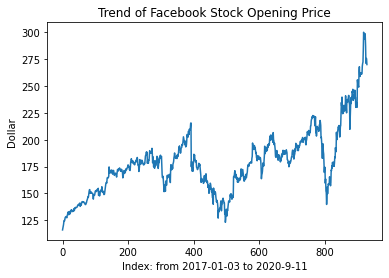

In [ ]:
df['Open'].plot(label = 'Facebook Stock Opening Price')
plt.title('Trend of Facebook Stock Opening Price')
plt.xlabel("Index: from 2017-01-03 to 2020-9-11")
plt.ylabel("Dollar")
plt.show()

####**b. Stock Closing Price Trend from the year of 2017 to 2020**

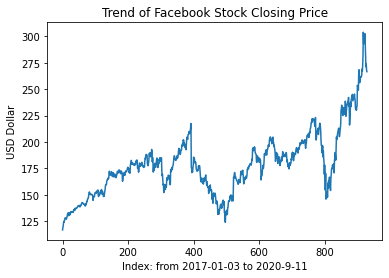

In [ ]:
df['Close'].plot(label = 'Facebook Stock Closing Price')
plt.title('Trend of Facebook Stock Closing Price')
plt.xlabel("Index: from 2017-01-03 to 2020-9-11")
plt.ylabel("USD Dollar")
plt.show()

####**c. Stock Highest Price Trend from the year of 2017 to 2020**

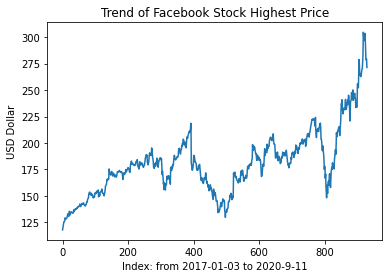

In [ ]:
df['High'].plot(label = 'The highest price of the day')
plt.title('Trend of Facebook Stock Highest Price')
plt.xlabel("Index: from 2017-01-03 to 2020-9-11")
plt.ylabel("USD Dollar")
plt.show()

####**d. Stock Lowest Price Trend from the year of 2017 to 2020**

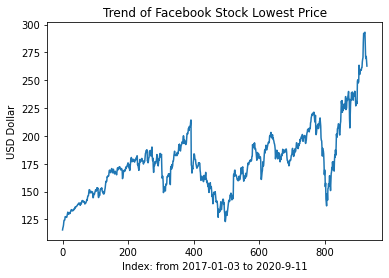

In [ ]:
df['Low'].plot(label = 'The lowest price of the day')
plt.title('Trend of Facebook Stock Lowest Price')
plt.xlabel("Index: from 2017-01-03 to 2020-9-11")
plt.ylabel("USD Dollar")
plt.show()

####**d. Stock Adjusted Closing Price Trend from the year of 2017 to 2020**

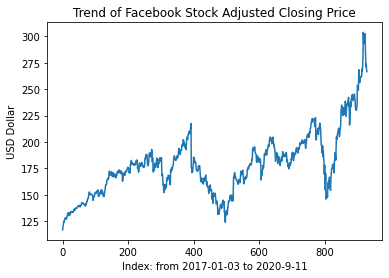

In [ ]:
df['Adj Close'].plot(label = 'The adjusted closing price of the day')
plt.title('Trend of Facebook Stock Adjusted Closing Price')
plt.xlabel("Index: from 2017-01-03 to 2020-9-11")
plt.ylabel("USD Dollar")
plt.show()

####**e. Stock Trading Volume from the year of 2017 to 2020**

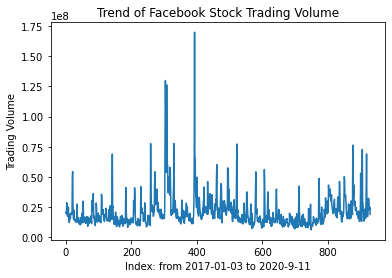

In [ ]:
df['Volume'].plot(label = 'stock-trading volume')
plt.title('Trend of Facebook Stock Trading Volume')
plt.xlabel("Index: from 2017-01-03 to 2020-9-11")
plt.ylabel("Trading Volume")
plt.show()

**The plots above shows that the Facebook stock price is affected by the trading volume in recent years. As the stock price goes up, the trading volume increases too. Same as the stock price goes down, the trading volume decreases.**

####**f. Autocorrelation of stock closing price**

Text(0.5, 1.0, 'Facebook Autocorrelation plot')

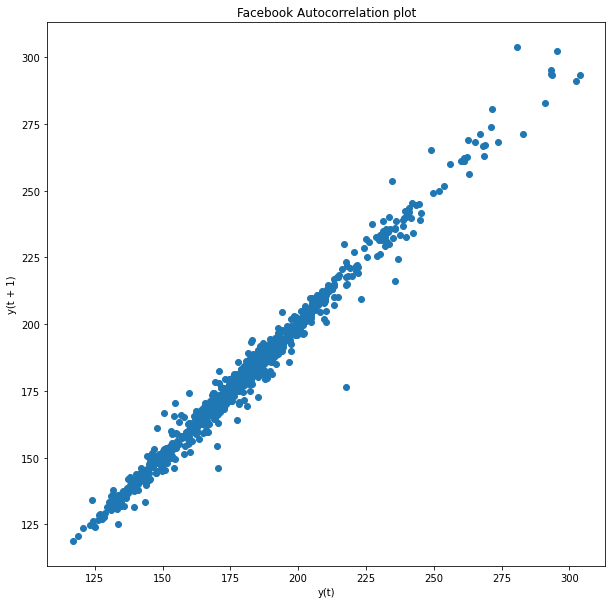

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=1)
plt.title('Facebook Autocorrelation plot')

**We can analyze the autocorrelation graph from the following perspectives.**


*   Model suitability
>The shape of the autocorrelation graph can provide clues about the data infrastructure. The linear shape of the curve indicates that the autoregressive model may be a better choice.

*   Outliers (data points with extremely high or low values).
>In this graph, we noticed few outliers. This is reasonable, because oulier means that the stock price changes significantly overnight, which is rarely the case for large mature companies.

*   Randomness (no pattern data).
>The random data will be evenly distributed in the horizontal and vertical directions. Apple's stock price is obviously not random.

*   Sequence correlation (the error term in the time series shifts from one cycle to another).
>If the data shows a linear pattern, then there is an autocorrelation. A positive linear trend indicates that the autocorrelation is positive. A negative linear trend indicates that the autocorrelation is negative. The more the data is clustered around the diagonal, the more autocorrelation. Fully autocorrelated data will be gathered on a diagonal line. We can see that our data is completely autocorrelated.

*   Seasonality (cyclic fluctuations of time series data that occur regularly).
>Data with seasonality will periodically repeat itself in a sine or cosine-like waveform. Our data is definitely not seasonal.

####**g. Nested Autocorrelation of stock closing price**

Text(0.5, 1.0, 'Facebook Nested Autocorrelation plot')

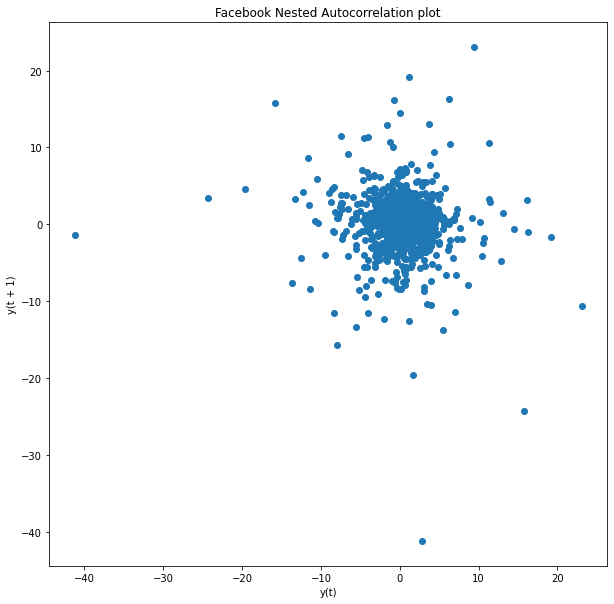

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot((df['Close']-df['Close'].shift(1)), lag=1)
plt.title('Facebook Nested Autocorrelation plot')

**The picture above is actually the lag plot of the lag plot. It shows the autocorrelation of the autocorrelation. We can notice there is roughly a round which centers in (0, 0). It indicates that the stock price change steadily, namely the change of stock price change is small.**

##**3. Data Preparation**



###**3.1. Data Preparation for RNN + LSTM**

####**3.1.1. Select data**
We split the stock price data into training and testing dataset, which the data from the year of 2017 to 2019 are used for training, while the stock price data in the year of 2020 are used for testing.

In [ ]:
data_train = df[df['Date']<'2020-01-01'].copy()
print(data_train)

           Date        Open        High  ...       Close   Adj Close    Volume
0    2017-01-03  116.029999  117.839996  ...  116.860001  116.860001  20663900
1    2017-01-04  117.550003  119.660004  ...  118.690002  118.690002  19630900
2    2017-01-05  118.860001  120.949997  ...  120.669998  120.669998  19492200
3    2017-01-06  120.980003  123.879997  ...  123.410004  123.410004  28545300
4    2017-01-09  123.550003  125.430000  ...  124.900002  124.900002  22880400
..          ...         ...         ...  ...         ...         ...       ...
749  2019-12-24  206.300003  206.789993  ...  205.119995  205.119995   6046300
750  2019-12-26  205.570007  207.820007  ...  207.789993  207.789993   9350700
751  2019-12-27  208.669998  208.929993  ...  208.100006  208.100006  10284200
752  2019-12-30  207.860001  207.899994  ...  204.410004  204.410004  10524300
753  2019-12-31  204.000000  205.559998  ...  205.250000  205.250000   8953500

[754 rows x 7 columns]


In [ ]:
data_test = df[df['Date']>='2020-01-01'].copy()
print(data_test)

           Date        Open        High  ...       Close   Adj Close    Volume
754  2020-01-02  206.750000  209.789993  ...  209.779999  209.779999  12077100
755  2020-01-03  207.210007  210.399994  ...  208.669998  208.669998  11188400
756  2020-01-06  206.699997  212.779999  ...  212.600006  212.600006  17058900
757  2020-01-07  212.820007  214.580002  ...  213.059998  213.059998  14912400
758  2020-01-08  213.000000  216.240005  ...  215.220001  215.220001  13475000
..          ...         ...         ...  ...         ...         ...       ...
925  2020-09-04  287.250000  289.000000  ...  282.730011  282.730011  30333700
926  2020-09-08  271.279999  279.299988  ...  271.160004  271.160004  24864000
927  2020-09-09  275.769989  278.480011  ...  273.720001  273.720001  22918800
928  2020-09-10  275.510010  279.160004  ...  268.089996  268.089996  24814700
929  2020-09-11  270.059998  271.390015  ...  266.609985  266.609985  18906100

[176 rows x 7 columns]


####**3.1.2. Data Cleaning**
Step 1:  We are decided to remove two columns, which is the "Date" and "Adj Close" by dropping them from both training and testing data. The "Date" attribute is not essential because the final result of prediction will render according to the relationship between time and price instead of date and price as the RNN + LSTM model is suitable to apply in classifying, processing and undergoing predictions based on time series data. In addition, the "Adj Close" is also removed because its values are actually generated by through amending the stock's closing price ("Close" attribute values) to reflect that stock's value after accounting for any corporate actions. But, in this dataset, we realise that the values of closing price and adjust closing prices are totally same, which means there are no adjustment and amendement to do with the closing price and calculate a new adjusted closing price. Hence, the "Adj Close" columns value will be meaningless in this prediction task.

In [ ]:
data_train = data_train.drop(['Date', 'Adj Close'], axis = 1)
print(data_train)

           Open        High         Low       Close    Volume
0    116.029999  117.839996  115.510002  116.860001  20663900
1    117.550003  119.660004  117.290001  118.690002  19630900
2    118.860001  120.949997  118.320000  120.669998  19492200
3    120.980003  123.879997  120.029999  123.410004  28545300
4    123.550003  125.430000  123.040001  124.900002  22880400
..          ...         ...         ...         ...       ...
749  206.300003  206.789993  205.000000  205.119995   6046300
750  205.570007  207.820007  205.309998  207.789993   9350700
751  208.669998  208.929993  206.589996  208.100006  10284200
752  207.860001  207.899994  203.899994  204.410004  10524300
753  204.000000  205.559998  203.600006  205.250000   8953500

[754 rows x 5 columns]


Step 2:  To predict opening on any day, we need the data of previous 60 days. "past_60_days" variable contains the data of the last 60 days from training dataset, "data_train" required to predict the opening of the 1st day in the testing dataset. After that, we will append "data_test" to "past_60_days".

In [ ]:
data_test = data_test.drop(['Date', 'Adj Close'], axis = 1)
past_60_days = data_train.tail(60)
new_data_test = past_60_days.append(data_test, ignore_index = True)
print(new_data_test)

           Open        High         Low       Close    Volume
0    180.000000  181.179993  178.089996  179.679993   9178300
1    178.259995  180.369995  177.720001  177.750000   9466900
2    179.160004  180.720001  177.940002  179.850006   7556900
3    180.320007  181.610001  179.169998  180.029999   8605000
4    182.149994  186.490005  182.139999  184.190002  14930500
..          ...         ...         ...         ...       ...
231  287.250000  289.000000  271.140015  282.730011  30333700
232  271.279999  279.299988  269.420013  271.160004  24864000
233  275.769989  278.480011  271.350006  273.720001  22918800
234  275.510010  279.160004  267.029999  268.089996  24814700
235  270.059998  271.390015  262.640015  266.609985  18906100

[236 rows x 5 columns]


####**3.1.3. Feature Scaling**
Step 1: The values in the training data are not in the same range. For getting all the values in between the range 0 to 1 we are going to use MinMaxScalar().This improves the accuracy of prediction.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #scaling each feature into 0~1 range only, train better

data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[0.        , 0.        , 0.        , 0.        , 0.08926375],
       [0.01524731, 0.01805922, 0.01802348, 0.01818363, 0.08295564],
       [0.02838802, 0.03085931, 0.02845279, 0.03785768, 0.08210866],
       ...,
       [0.92928074, 0.90384995, 0.92223564, 0.90659783, 0.02587914],
       [0.92115558, 0.89362968, 0.89499788, 0.86993247, 0.02734533],
       [0.88243554, 0.87041082, 0.89196033, 0.87827901, 0.01775309]])

Step 2: Creating Data with Timesteps: 
*   LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 60 timesteps and converting it into an array using NumPy. That means that we are going to train the model on data of 60 days at a time. So the code mentioned below divides the data into chunks of 60 rows. data_train_scaled.shape[0] is equal to 754 which corresponds to the length of data_train. Next, we convert the data into a 3D dimension array with X_train samples, 60 timestamps, and one feature at each step.

In [ ]:
X_train = []
y_train = []

for i in range(60, data_train_scaled.shape[0]):
    X_train.append(data_train_scaled[i-60:i])
    y_train.append(data_train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(694, 60, 5)
(694,)


Step 3 : Repeat Step 1 and Step 2 with testing data (data_test)

In [ ]:
data_test_scaled = scaler.transform(new_data_test)
data_test_scaled

array([[0.64168923, 0.62849769, 0.63365728, 0.62420501, 0.01912585],
       [0.62423508, 0.62046041, 0.62991087, 0.60502782, 0.02088822],
       [0.63326315, 0.62393338, 0.6321385 , 0.62589433, 0.00922462],
       ...,
       [1.60236721, 1.59396722, 1.5779668 , 1.55862482, 0.10303351],
       [1.59975933, 1.60071452, 1.53422432, 1.5026828 , 0.114611  ],
       [1.54508974, 1.523616  , 1.48977329, 1.4879768 , 0.07852958]])

In [ ]:
X_test = []
y_test = []

for i in range(60, data_test_scaled.shape[0]):
    X_test.append(data_test_scaled[i-60:i])
    y_test.append(data_test_scaled[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(176, 60, 5)
(176,)


###**3.2. Data Preparation for Decision Tree Regressor and Linear Regression**

This data is prepared for the modeling in decision tree regressor and linear regression. In order to count the future stock price, we gather all the closed stock price in the data set. We assign all the close stock price of the data set in the data_pre2, and 5 of the results are shown below.

In [ ]:
data_pre2=df[['Close']]
data_pre2.head(5)

,Close
0,116.860001
1,118.690002
2,120.669998
3,123.410004
4,124.900002


We set the data for predicting 'x' days out into the future. Assume that we need to predict the future 25 days of the close price, we set the future_days value to 25. Next, we create new column for the future_days for storing the predicted close stock price. The predicted result will be null in the future 25 days for the machine learning to do prediction because we shift the result out by the value of future_days.

In [ ]:
#Set the data for predict 'x' days out into the future
future_days=25
#Create new column (target) shifted 'x' units/days up
data_pre2['Predict result'] = data_pre2[['Close']].shift(-future_days)
data_pre2.tail(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Predict result
926,271.160004,NaN
927,273.720001,NaN
928,268.089996,NaN
929,266.609985,NaN


We seperate the data for training&testing with the data for prediction. We assign the data for training and testing to X. We take the whole data size and minus the future days for prediction. Later, We drop the Predict result column because we want to store every close stock price values in X.

In [ ]:
#Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(data_pre2.drop(['Predict result'],1))[:-future_days]

Store predict result in y

In [ ]:
#Create the target data set (y) annd convert it to a numpy array and get all of the target values expect the last 'x' rows/days
y = np.array(data_pre2['Predict result'])[:-future_days]

We use train_test_split to split the data into 25% testing and 75% training.

In [ ]:
#Split the data into 75% training and 25% testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.25)

We prepare the data for prediction. We assign the data and drop the predict result.

In [ ]:
#Get the last 'x' rows of the future data set
x_future = data_pre2.drop(['Predict result'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

###**3.3. Random Forest**

####**3.3.1. Load Data** 

In [ ]:
import os
if os.path.exists('FB.csv'):

    # Load the data
    price_data = pd.read_csv('FB.csv')

else:

    # Grab the data and store it.
    grab_price_data()

    # Load the data
    price_data = pd.read_csv('FB.csv')

# Display the head before moving on.
price_data.head()

In [ ]:
#reorganizing data
price_data = price_data[['Date','Open','Close','High','Low','Adj Close','Volume']]

# sort the values by symbol and then date
price_data.sort_values(by = ['Date'], inplace = True)
price_data
# calculate the change in price
price_data['change_in_price'] = price_data['Close'].diff()
price_data.head(10)

####**3.3.2. RSI**

In [ ]:
# Calculate the 14 day RSI
n = 14

# First make a copy of the data frame twice
up_df, down_df = price_data[['change_in_price']].copy(), price_data[['change_in_price']].copy()

# For up days, if the change is less than 0 set to 0.
up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

# For down days, if the change is greater than 0 set to 0.
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

# We need change in price to be absolute.
down_df['change_in_price'] = down_df['change_in_price'].abs()

# Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
ewma_up = up_df['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

# Calculate the Relative Strength
relative_strength = ewma_up / ewma_down

# Calculate the Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

# Add the info to the data frame.
price_data['down_days'] = down_df['change_in_price']
price_data['up_days'] = up_df['change_in_price']
price_data['RSI'] = relative_strength_index

# Display the head.
price_data.head(30)

####**3.3.3. Stochastic Oscillator**

In [ ]:
# Calculate the Stochastic Oscillator
n = 14

# Make a copy of the high and low column.
low_14, high_14 = price_data[['Low']].copy(), price_data[['High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((price_data['Close'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
price_data['low_14'] = low_14
price_data['high_14'] = high_14
price_data['k_percent'] = k_percent

# Display the head.
price_data.head(30)

####**3.3.4. Williams %R**

In [ ]:
# Calculate the Williams %R
n = 14

# Make a copy of the high and low column.
low_14, high_14 = price_data[['Low']].copy(), price_data[['High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate William %R indicator.
r_percent = ((high_14 - price_data['Close']) / (high_14 - low_14)) * - 100

# Add the info to the data frame.
price_data['r_percent'] = r_percent

# Display the head.
price_data.head(30)

####**3.3.5. Moving Average Convergence Divergnece (MACD)**

In [ ]:
# Calculate the MACD
ema_26 = price_data['Close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = price_data['Close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
price_data['MACD'] = macd
price_data['MACD_EMA'] = ema_9_macd

# Print the head.
price_data.head(30)

####**3.3.5. Price Rate Of Change**

In [ ]:
# Calculate the Price Rate of Change
n = 9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
price_data['Price_Rate_Of_Change'] = price_data['Close'].transform(lambda x: x.pct_change(periods = n))

# Print the first 30 rows
price_data.head(30)

##**4. Modeling**

####**Model 1 : Recurrent Neural Network + Long Short Term Memory (RNN + LSTM)**
Step 1 : Initialize the RNN with Sequential() function that provided by Keras library.

In [ ]:
model = Sequential()

Step 2: Add the LSTM layer and later add a few Dropout layers to prevent overfitting.
*   We add the LSTM layer with the following arguments:
60 units (for 1st and 2nd layer), 80 units (for 3rd layer), and 120 units (for 4th layer) which are the dimensionality of the output space. 

*   We will be using relu activation function. The rectified linear activation
function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, the output will be zero.


*   We set return_sequence = True for the purpose for returning the full sequence as the output.

*   "input_shape" is set to (X_train.shape[1],5) which is (60,5)

*   When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.

*   The last layer is the Dense layer is the regular deeply connected neural network layer. We add the Dense layer (last layer) that specifies the output of 1 unit. 


In [ ]:
#1st layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

#2nd layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

#3rd layer
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

#4th layer
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

#last layer
model.add(Dense(units = 1))

**Below show the summary details of building LSTM.**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

Step 3: Then, we compile our model using the popular "adam" optimizer and set the loss as the mean_squarred_error. This will compute the mean of the squared errors. Next, we fit the model to run on 50 epochs with a batch size of 32 and store in the variable, "history" to use displaying model loss graph later. 

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), shuffle=True)           

Epoch 1/50
22/22 [==============================] - 4s 174ms/step - loss: 0.1003 - val_loss: 0.0473
Epoch 2/50
22/22 [==============================] - 3s 148ms/step - loss: 0.0149 - val_loss: 0.0658
Epoch 3/50
22/22 [==============================] - 3s 148ms/step - loss: 0.0129 - val_loss: 0.0438
Epoch 4/50
22/22 [==============================] - 3s 148ms/step - loss: 0.0122 - val_loss: 0.0390
Epoch 5/50
22/22 [==============================] - 3s 151ms/step - loss: 0.0110 - val_loss: 0.0414
Epoch 6/50
22/22 [==============================] - 3s 149ms/step - loss: 0.0112 - val_loss: 0.0526
Epoch 7/50
22/22 [==============================] - 3s 153ms/step - loss: 0.0101 - val_loss: 0.0456
Epoch 8/50
22/22 [==============================] - 3s 147ms/step - loss: 0.0091 - val_loss: 0.0290
Epoch 9/50
22/22 [==============================] - 3s 150ms/step - loss: 0.0097 - val_loss: 0.0906
Epoch 10/50
22/22 [==============================] - 3s 153ms/step - loss: 0.0092 - val_loss: 0.0350

**Below shows the plot graph of model loss.**

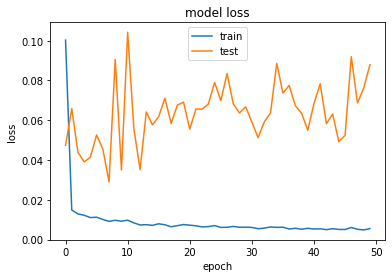

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

Step 4: We predict the opening price for X_test using predict()

In [ ]:
y_pred = model.predict(X_test)

Step 5: As we had scaled all the values down, now we will have to get them back to the original scale. scaler.scale_ gives the scaling level

In [ ]:
scaler.scale_

array([1.00310962e-02, 9.92260379e-03, 1.01255567e-02, 9.93640709e-03,
       6.10659427e-09])

Step 6: Referring to the previous result, 1.00310962e-02 is the first value in the list which gives the scale of opening price. We will multiply y_pred and y_test with the inverse of this to get all the values to the original scale.

In [ ]:
scale = 1/1.00310962e-02

actual_stock_price = y_test*scale
predicted_stock_price = y_pred*scale

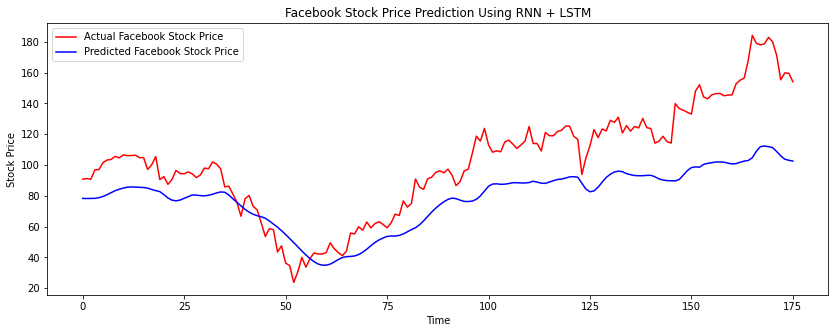

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(actual_stock_price, color = 'red', label = 'Actual Facebook Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Facebook Stock Price')
plt.title('Facebook Stock Price Prediction Using RNN + LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

####**Model 2 : Decision Tree Regressor**

Step 1: We use decision tree regressor to calculate and predict the future stock price. First, we fit the regressor with x train and y train data. Later, we predict the x future data to get the future stock price.

In [ ]:
#Create the decision tree regressor regressor
tree = DecisionTreeRegressor().fit(x_train2,y_train2)
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[268.440002 262.794998 262.794998 259.890015 261.299988 261.23999
 261.160004 262.339996 262.794998 262.794998 267.01001  271.390015
 267.01001  303.910004 241.75     244.5      293.200012 295.440002
 302.5      291.119995 282.730011 271.160004 273.720001 268.089996
 282.730011]


Step 2: We visualize the data. We assign the result of decision tree regressor prediction. Plot the figure with days and close stock price. The original stock price and the predicted stock price will be shown with different colors in the figure below.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


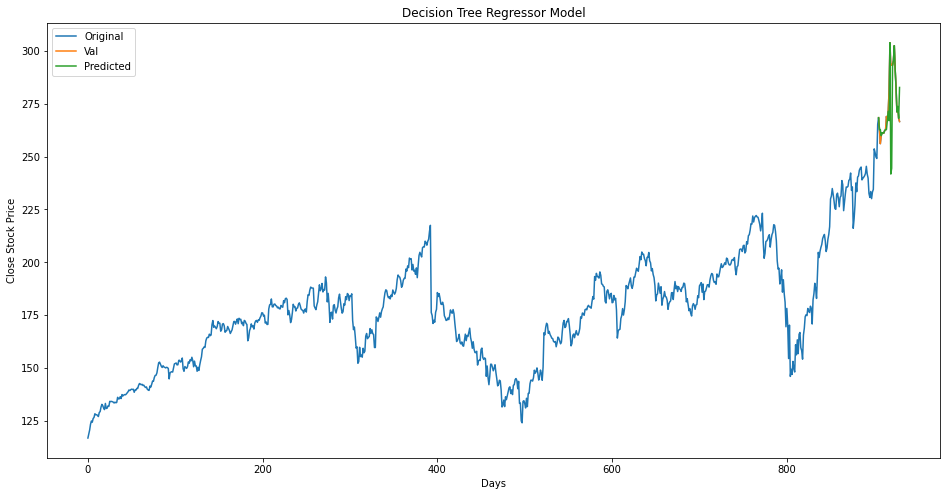

In [ ]:
#Visualize data
prediction = tree_prediction

valid=data_pre2[X.shape[0]:]
valid['Predict result'] = prediction
plt.figure(figsize=(16,8))
plt.title('Decision Tree Regressor Model')
plt.xlabel('Days')
plt.ylabel('Close Stock Price')
plt.plot(data_pre2['Close'])
plt.plot(valid[['Close','Predict result']])
plt.legend(['Original','Val','Predicted'])
plt.show()

####**Model 3 : Linear Regression**

Step 1: We use linear regression to calculate and predict the future stock price. First, we fit the regressor with x train and y train data. Later, we predict the x future data to get the future stock price.

In [ ]:
#Create the linear regression regressor
lr = LinearRegression().fit(x_train2,y_train2)
lr_prediction = lr.predict(x_future)
print(lr_prediction)



[231.55765077 237.68410814 238.20209021 240.63124003 241.45286214
 241.96191799 236.54098013 237.19291726 237.68410814 238.26459793
 239.24697969 242.27448426 238.99692113 237.31794609 230.82534096
 229.13744057 231.62909811 228.61051888 231.44154727 232.52216757
 249.64230728 248.11516655 246.21292414 245.57883857 260.01084458]


Step 2: We visualize the data. We assign the result of linear regression prediction. Plot the figure with days and close stock price. The original stock price and the predicted stock price will be shown with different colors in the figure below.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


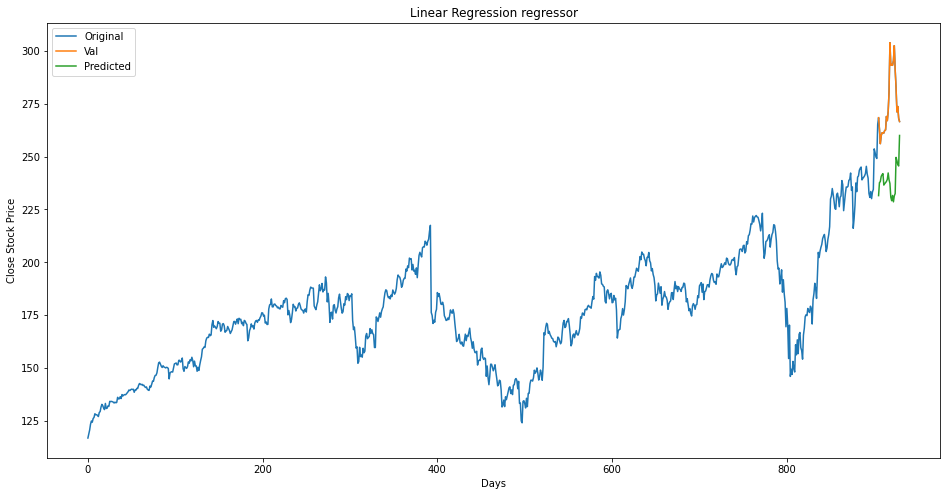

In [ ]:
#Visualize data
prediction = lr_prediction

valid=data_pre2[X.shape[0]:]
valid['Predict result'] = prediction
plt.figure(figsize=(16,8))
plt.title('Linear Regression regressor')
plt.xlabel('Days')
plt.ylabel('Close Stock Price')
plt.plot(data_pre2['Close'])
plt.plot(valid[['Close','Predict result']])
plt.legend(['Original','Val','Predicted'])
plt.show()

####**Model 4 : Random Forest**

**Creating the Prediction Column**

In [ ]:
# Group by the `Symbol` column, then grab the `Close` column.
close_groups = price_data['Close']

# Apply the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff()))

# add the data to the main dataframe.
price_data['Prediction'] = close_groups

# for simplicity in later sections I'm going to make a change to our prediction column. To keep this as a binary classifier I'll change flat days and consider them up days.
price_data.loc[price_data['Prediction'] == 0.0] = 1.0

# print the head
price_data.head(50)

# OPTIONAL CODE: Dump the data frame to a CSV file to examine the data yourself.
# price_data.to_csv('final_metrics.csv')

**Removing null value**

In [ ]:

# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Any row that has a `NaN` value will be dropped.
price_data = price_data.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Print the head.
price_data.head()

**Splitting the Data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Grab our X & Y Columns.
X_Cols = price_data[['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD']]
Y_Cols = price_data['Prediction']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(X_test)

##**5. Evaluation**

We will evaluate how these 3 predicted models are the responsible to reach our objectives: prediciction accuracy and insight.

LSTM should provide a better accuracy, since it is RNN based which can preserve the previous trained weights for the next training iteration. It is important so that business owner/ user can know the insight of the data trend correctly and has higher creditibiliy to make decision and rely on the system. The reason it is not performed well may because the feature selected is not enough for us to train.

Besides, the decision tree has only reached around 49% of accuracy score, although the visualized graph seemed it is accurate. This may because of the testing datasets that was auto splitted is not understand by the desision tree model. Thus, we evaluated if we overtrained the model by looking at how is the RMSE. The result is around 21.61, we are not overtrain the model. We conclude that the model is not well-trained. This may be caused by the features (X) selected for training is too less. This can be improved by using more features.

The linear regression model has RMSE of around 17.63, which is abit high and considered as the regression line has good fit to the actual dataset. This indicate that we did not overtrain the model which will produce inaccurate result. Another reason for this is we have preprocessed date by using Closing Price to train. This is considered good because user can have a quite correct insight on how is the closing price of predicted next day. Also, it can be improved by increase number of features for training.




In [ ]:
######################## decision tree ##############
from sklearn import metrics
print('Score = ' , tree.score(x_test2, y_test2)) #score
y_pred = tree.predict(x_test2)
print('RMSE of decision tree = ', np.sqrt(metrics.mean_squared_error(y_test2, y_pred))) # RMSE 
######################## linear regression ##############
from sklearn import metrics
y_pred = lr.predict(x_test2)
print('RMSE of linear regression = ', np.sqrt(metrics.mean_squared_error(y_test2, y_pred))) # RMSE 


Score =  0.4941073202090089
RMSE of decision tree =  21.4728880633902
RMSE of linear regression =  17.70619677573663


This section evaluate the regressor with . 
- is regressor efficient to our business?
- findings?
- challenge/oppoutunity

**Model Evaluation: Accuracy**

In [ ]:

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
# Print the Accuracy of our Model.
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)

**Model Evaluation: Classification Report for Random Forest**

In [ ]:
# Define the traget names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

**Model Evaluation: Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = plot_confusion_matrix(rand_frst_clf, X_test, y_test, display_labels = ['Down Day', 'Up Day'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

##**6. Deployment**

The visualized diagram should be added to a dashboard using library like tensorboard, dash and so on. The dashboard can let user interactive with it, know the insight/trends of stock price and the prediction when deployed in produciton business environment. The dashboard is connected to a server port, which need some API to implement it.


## **7.** **Conclusion**


In conclusion, actually LSTM-RNN is better for the stock prediction which is time series data. Also, the feature selected for training should be understand and prepared enough to ensure the model accuracy is high. Thus, data preparation like feature engineering is extremely important before we select what data is useful to be our training data.